In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Scatterplots

f we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a **scatterplot**, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second.

In [2]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


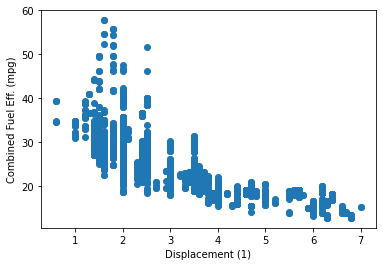

In [3]:
plt.scatter(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

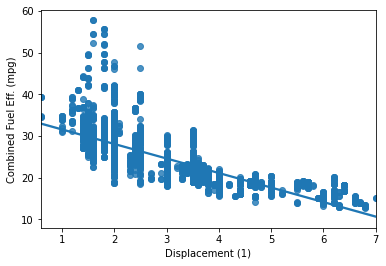

In [4]:
sb.regplot(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

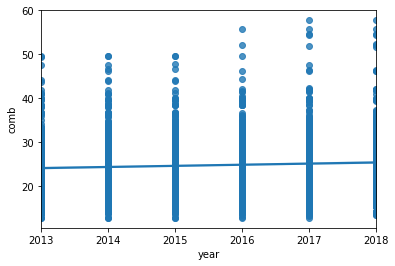

In [5]:
sb.regplot(data=fuel_econ, x='year', y='comb');

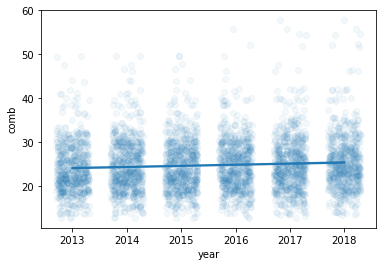

In [6]:
sb.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha': 1/20});

# Heat Maps

A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color.

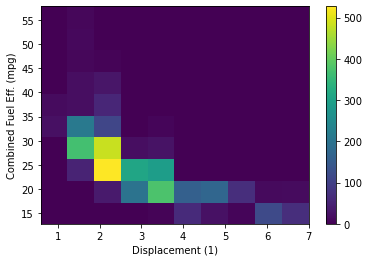

In [7]:
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

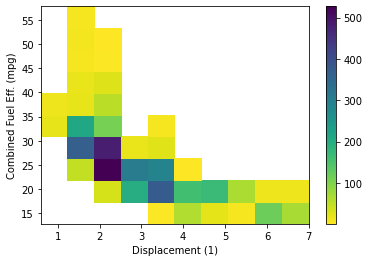

In [8]:
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [9]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


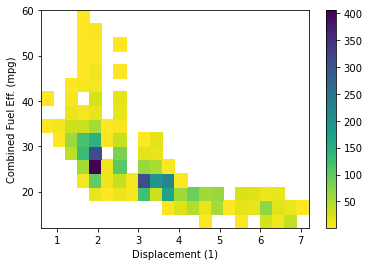

In [10]:
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58 + 3, 3)
plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Violin Plots

There are a few ways of plotting the relationship between one quantitative and one qualitative variable, that demonstrate the data at different levels of abstraction. The **violin plot** is on the lower level of abstraction. For each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a kernel density estimate, something like a smoothed histogram. There is an extra section at the end of the previous lesson that provides more insight into kernel density estimates.

In [11]:
sedan_classes = [f'{type} Cars' for type in ['Minicompact', 'Subcompact', 'Compact', 'Midsize', 'Large']]
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

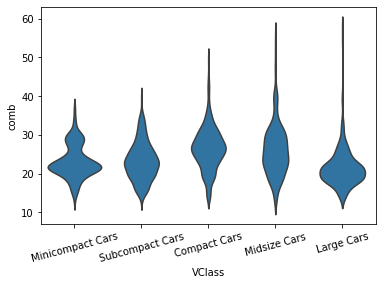

In [12]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None)
plt.xticks(rotation=15);

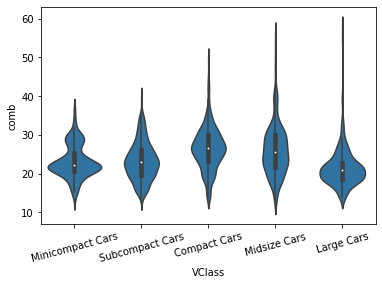

In [13]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

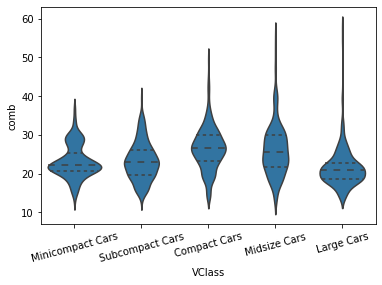

In [14]:
base_color = sb.color_palette()[0]
sb.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile')
plt.xticks(rotation=15);

# Box Plots

A **box plot** is another way of showing the relationship between a numeric variable and a categorical variable. Compared to the violin plot, the box plot leans more on summarization of the data, primarily just reporting a set of descriptive statistics for the numeric values on each categorical level.

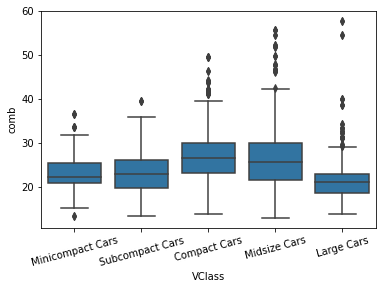

In [15]:
base_color = sb.color_palette()[0]
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);

# Clustered Bar Charts

To depict the relationship between two categorical variables, we can extend the univariate bar chart seen in the previous lesson into a **clustered bar chart**. Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret. In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster.

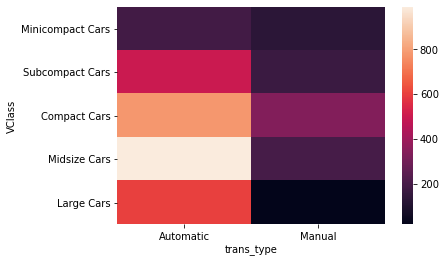

In [16]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
sb.heatmap(ct_counts);

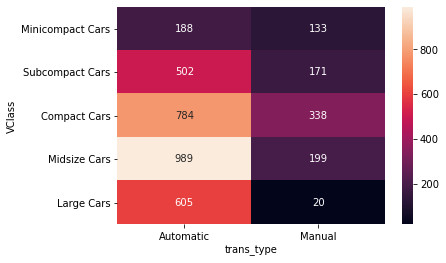

In [17]:
sb.heatmap(ct_counts, annot=True, fmt='d');

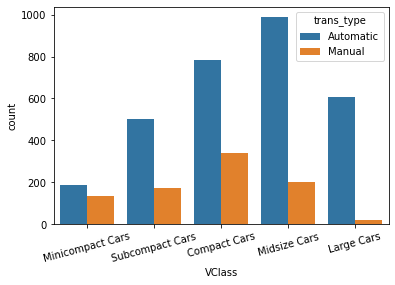

In [18]:
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

# Faceted Plots

One general visualization technique that will be useful for you to know about to handle plots of two or more variables is **faceting**. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

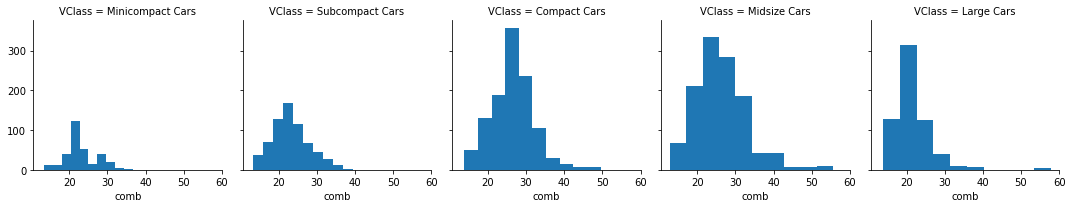

In [19]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.hist, 'comb');

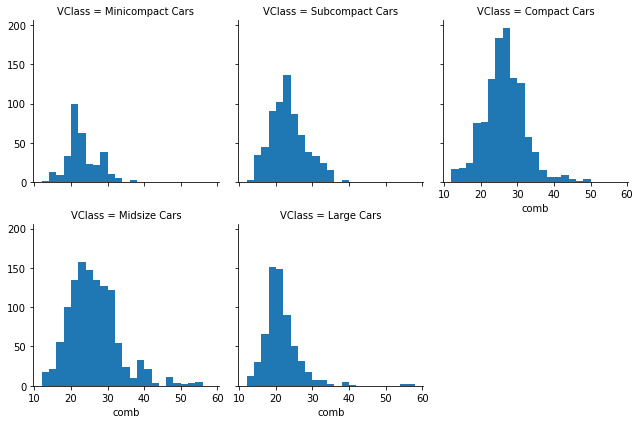

In [20]:
bins = np.arange(12, 58 + 2, 2)
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(plt.hist, 'comb', bins=bins);

# Plots Adaptation

Histograms and bar charts were introduced in the previous lesson as depicting the distribution of numeric and categorical variables, respectively, with the height (or length) of bars indicating the number of data points that fell within each bar's range of values. These plots can be adapted for use as bivariate plots by, instead of indicating count by height, indicating a mean or other statistic on a second variable.

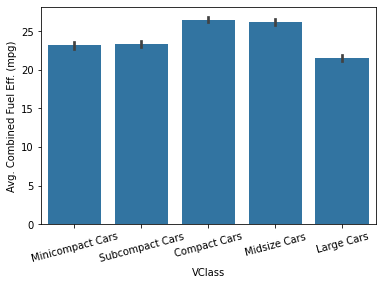

In [21]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

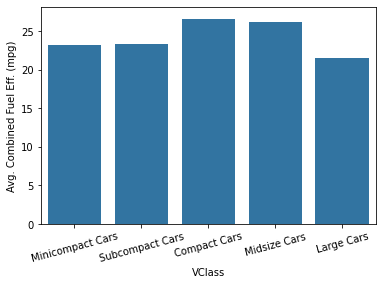

In [22]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

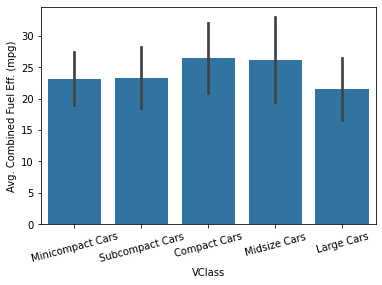

In [23]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

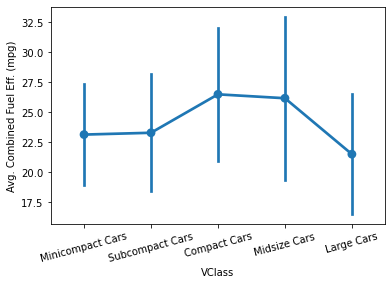

In [24]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

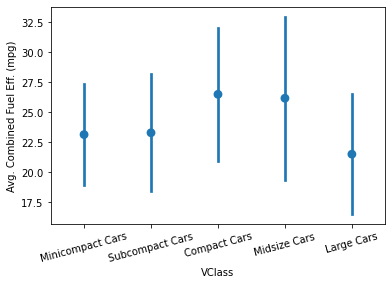

In [25]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles='')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

# Line Plots

The **line plot** is a fairly common plot type that is used to plot the trend of one numeric variable against values of a second variable. In contrast to a scatterplot, where all data points are plotted, in a line plot, only one point is plotted for every unique x-value or bin of x-values (like a histogram). If there are multiple observations in an x-bin, then the y-value of the point plotted in the line plot will be a summary statistic (like mean or median) of the data in the bin. The plotted points are connected with a line that emphasizes the sequential or connected nature of the x-values.

If the x-variable represents time, then a line plot of the data is frequently known as a **time series plot**. 

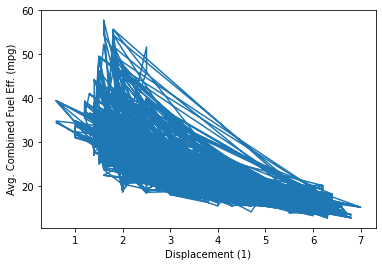

In [26]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xlabel('Displacement (1)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

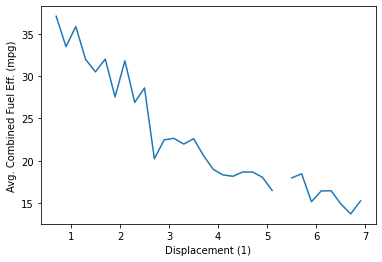

In [27]:
bins_e = np.arange(0.6, 7 + 0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest=True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

plt.errorbar(x=bins_c, y=comb_mean)
plt.xlabel('Displacement (1)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

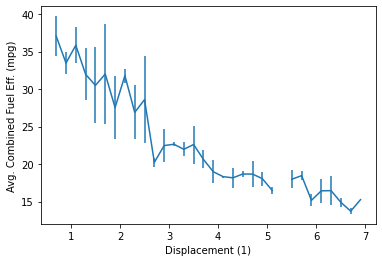

In [28]:
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

plt.errorbar(x=bins_c, y=comb_mean, yerr=comb_std)
plt.xlabel('Displacement (1)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');